# Importing Libraries.

In [13]:
#Data Exploration Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Manipulation Libraries.
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading

#Feature Engineering Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

#Model Evaluation Libraries. 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Model Libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Notebook Libraries.
import warnings
warnings.filterwarnings('ignore')


#Time Library
import time
import timeit

import mkl
mkl.set_num_threads(8)

4

# Important Functions (common to all datasets)

## Funtion to split dataset into training and testing data.

In [14]:
def train_data_test_data_split(dataset, frac, random_state):
    dataset = dataset.sample(frac = frac, random_state = random_state)
    train_data = dataset[:int(0.7 * len(dataset))]
    test_data = dataset[int(0.7 * len(dataset)):]

    return train_data, test_data

## Function to scale the training and testing datasets.

In [15]:
def scaling(train_data, test_data, cols):
    scaler = StandardScaler()
    
    train_data[cols] = scaler.fit_transform(train_data[cols])
    test_data[cols] = scaler.transform(test_data[cols])
        
    return train_data, test_data

## Label propagation and model fitting.

In [16]:
def unlabelled_data_and_label_propagation_and_model_fit(model, train_data, targetname, random_state = 7, threshold = 0.1):

    random_state = np.random.RandomState(random_state)
    label_propagation = LabelSpreading()

    
    random_unlabeled_points = random_state.rand(train_data[targetname].shape[0]) < threshold
    Unlabeled = np.copy(train_data[targetname])
    Unlabeled[random_unlabeled_points] = -1
    
    label_propagation.fit(train_data.drop(targetname, axis = 1), Unlabeled)
    predicted_labels = label_propagation.predict(train_data.drop(targetname, axis = 1))

    X_train = train_data.drop(targetname, axis = 1)
    y_train = predicted_labels

    model.fit(X_train, y_train)

    return model

## Test Dataset split Function.

In [17]:
def test_data_split(test_data, targetname):

    X_test = test_data.drop(targetname, axis = 1)
    y_test = test_data[targetname]

    return X_test, y_test

## Model Evaluation Functions.

In [18]:
def evaluate_model_classification(experimentname, model, X_test, y_test):

    print(f"For {experimentname}")
    y_pred = model.predict(X_test)

    print(" ")
    print("Classification Report")
    print(" ")
    print(classification_report(y_test, y_pred))
    print(" ")

    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

In [19]:
def evaluate_model_roc(experimentname, model, X_test, y_test):

    print(f"For {experimentname}")
    y_pred = model.predict(X_test)

    print(" ")
    print("ROC Curve")
    print(" ")
    plot_roc_curve(model, X_test, y_test)
    plt.show()

In [20]:
def evaluate_model_confusion(experimentname, model, X_test, y_test):

    print(f"For {experimentname}")
    y_pred = model.predict(X_test)

    print(" ")
    print("Confusion Matrix")
    print(" ")
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot = True, fmt = ".2f", cmap = "RdYlBu")
    plt.show()

## Plotting Accuracy and F1 scores Trends Function.

In [21]:
def plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values):

    evaluation_dict = {"threshold_value" : threshold_values,
                       "accuracy" : accuracy_values,
                       "f1_scores" : f1_values,
                       "Time": timer_values}

    trend = pd.DataFrame(evaluation_dict)
    trend.plot(x ='threshold_value', y='accuracy')
    trend.plot(x ='threshold_value', y='f1_scores') 
    trend.plot(x ='threshold_value', y='Time')

In [22]:
def clean_and_preprocess_intention_downsampling():
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = intention.sample(frac = 1.0, random_state = 42)
    train_data = intention[:int(0.7 * len(intention))]
    test_data = intention[int(0.7 * len(intention)):]
    
    train_data_minority = train_data[train_data.Revenue == True]
    train_data_majority = train_data[train_data.Revenue == False]
    
    train_data_majority_downsampled = resample(train_data_majority,random_state=42,n_samples=len(train_data_minority),replace=True)
    train_data_downsampled = pd.concat([train_data_minority, train_data_majority_downsampled])
    train_data = train_data_downsampled.sample(frac = 1.0, random_state = 42)
    
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    train_data = train_data[cols]
    test_data = test_data[cols]
    train_data = pd.get_dummies(train_data, columns=["VisitorType"])
    test_data = pd.get_dummies(test_data, columns=["VisitorType"])
    
    return train_data, test_data

# Heart Disease Dataset.

## Heart Disease Preprocessing Function.

In [23]:
def clean_and_preprocess_heart_dataset(heart_dataset):
    """Takes Heart Disease Dataset, performs feature selection and one hot encoding on 
    the dataset and returns it."""

    #Feature Selection.
    heart_dataset = heart_dataset.drop("chol", axis = 1)
    heart_dataset = heart_dataset.drop("fbs", axis = 1)
    
    #Finding Categorical and Continuous Features.
    categorical_features = []
    continuous_features = []
    for feature in heart_dataset.columns:
        if len(heart_dataset[feature].unique()) <= 10:
            categorical_features.append(feature)
        else:
            continuous_features.append(feature)

    categorical_features, continuous_features

    #One Hot Encoding The Dataset using the categorical features.
    categorical_features.remove("target")
    heart_dataset = pd.get_dummies(heart_dataset, columns=categorical_features)
    
    #Returning Preprocessed Dataset
    return heart_dataset

## Main Code

For 0.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.92      0.90      0.91        50

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

 
For 0.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


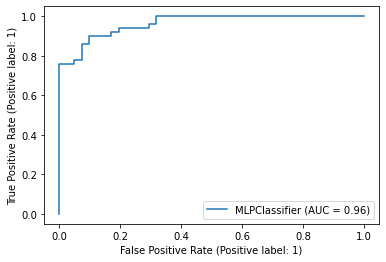

For 0.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


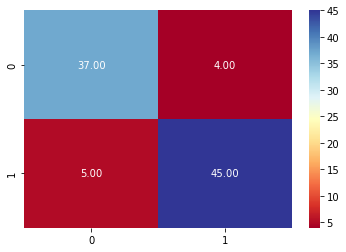

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 10.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

 
For 10.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


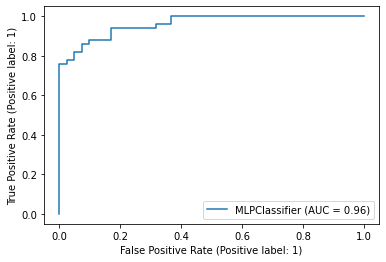

For 10.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


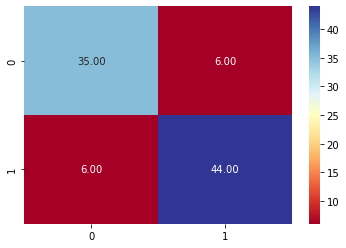

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 20.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

 
For 20.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


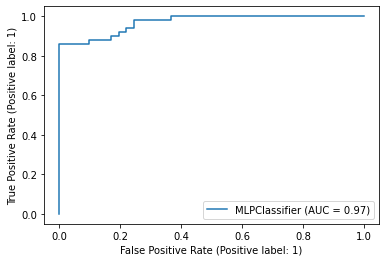

For 20.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


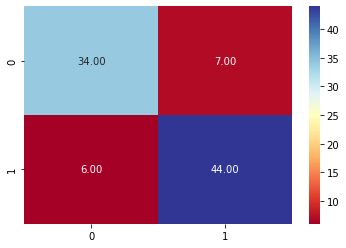

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 50.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

 
For 50.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


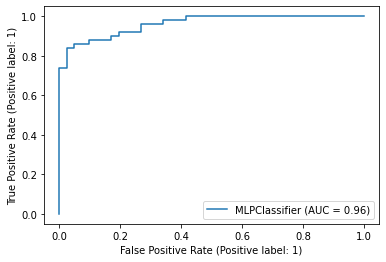

For 50.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


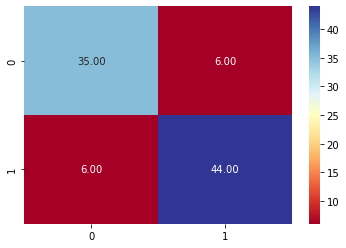

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 90.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        41
           1       0.95      0.78      0.86        50

    accuracy                           0.86        91
   macro avg       0.87      0.87      0.86        91
weighted avg       0.87      0.86      0.86        91

 
For 90.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


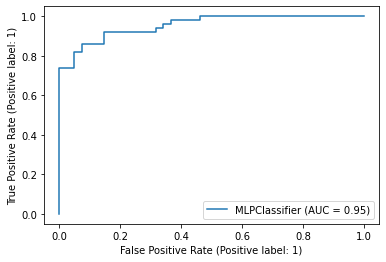

For 90.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


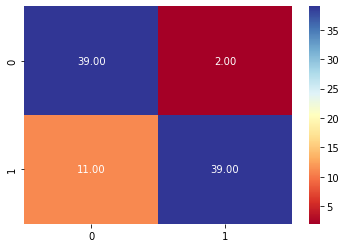

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 95.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

 
For 95.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


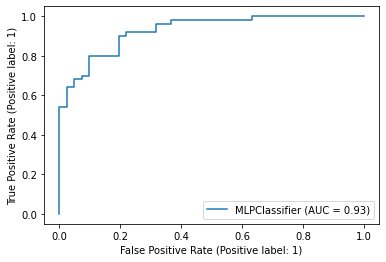

For 95.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


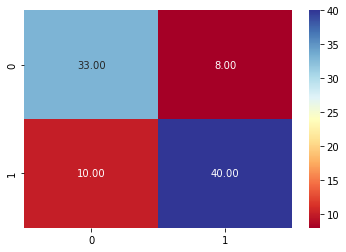

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [24]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
targetname = "target"
cols_scaling = ['age', 'trestbps', 'thalach', 'oldpeak']

for i in threshold_values:
    start = timeit.default_timer()
    
    heart_dataset = pd.read_csv("heart.csv")
    model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'constant', solver = 'sgd', random_state = 7)

    heart_dataset = clean_and_preprocess_heart_dataset(heart_dataset)
    train_data, test_data = train_data_test_data_split(dataset = heart_dataset, frac = 1.0, random_state = 7)
    train_data, test_data = scaling(train_data, test_data, cols_scaling)

    
    model = unlabelled_data_and_label_propagation_and_model_fit(model=model, train_data=train_data, targetname=targetname, random_state = 7, threshold=i)

    X_test, y_test = test_data_split(test_data=test_data, targetname = targetname)

    accuracy, f1 = evaluate_model_classification(f"{i * 100}% Unlabelled Data, Classification Report", model, X_test, y_test)

    accuracy_values.append(accuracy)
    f1_values.append(f1)

    evaluate_model_roc(f"{i * 100}% Unlabelled Data, ROC Curve", model, X_test, y_test)
    evaluate_model_confusion(f"{i * 100}% Unlabelled Data, Confusion Matrix", model, X_test, y_test)
    stop = timeit.default_timer()
    timer_values.append(stop - start)
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

## Plotting Accuracy and F1 Score Trends.

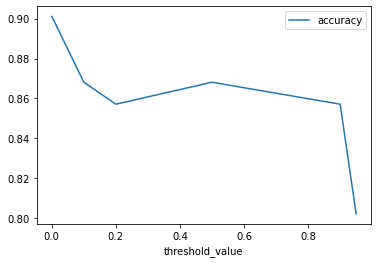

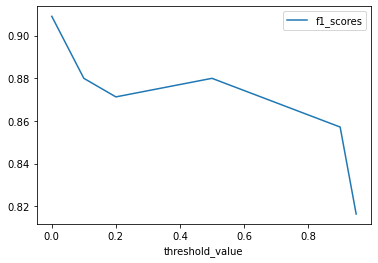

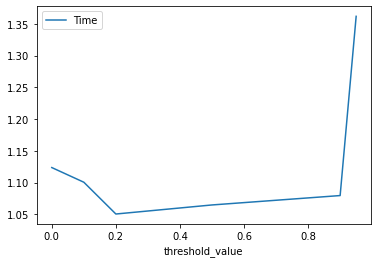

In [25]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Marketing Dataset.

## Marketing Dataset Preprocessing Function.

In [26]:
def clean_and_preprocess_marketing_dataset(customer):
    customer = pd.read_excel("marketing_campaign.xlsx")
    customer.loc[(customer['Income'].isnull() == True), 'Income'] = customer['Income'].median()   
    customer["Age"] = 2021 - customer["Year_Birth"]
    customer.drop("Year_Birth", axis = 1, inplace = True)
    customer.isna().sum()
    customer["Expense"] = customer["MntWines"]+ customer["MntFruits"]+ customer["MntMeatProducts"]+ customer["MntFishProducts"]+ customer["MntSweetProducts"]+ customer["MntGoldProds"]
    customer['Kids'] = customer['Kidhome'] + customer['Teenhome']
    customer['Expenses'] = customer['MntWines'] + customer['MntFruits'] + customer['MntMeatProducts'] + customer['MntFishProducts'] + customer['MntSweetProducts'] + customer['MntGoldProds']
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Married', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Together', 'In relationship')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Divorced', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Widow', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Absurd', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('Alone', 'Single')
    customer['Marital_Status'] = customer['Marital_Status'].str.replace('YOLO', 'Single')
    customer['Education'] = customer['Education'].str.replace('2n Cycle', 'Master') 
    customer['Dt_Customer'] = pd.to_datetime(customer.Dt_Customer)
    customer['Date_Collected'] = '01-01-2015'
    customer['Date_Collected'] = pd.to_datetime(customer.Date_Collected)
    customer['Time_Enrolled_Days'] = (customer['Date_Collected'] - customer['Dt_Customer']).dt.days
    customer = customer.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Recency', 'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Date_Collected'
       ])
    categorical_features = ['Education', 'Marital_Status']
    customer = pd.get_dummies(customer, columns=categorical_features)
    customer = customer[customer["Age"] < 90]
    customer["Teenhome"] = np.where(customer.Teenhome> 0, 1, 0)
    
    return customer

## Main Code.

For 0.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       351
           1       0.94      0.98      0.96       321

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672

 
For 0.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


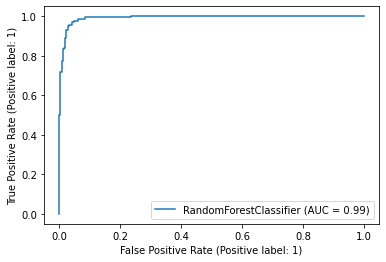

For 0.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


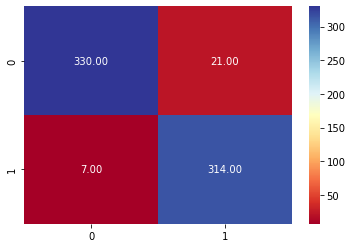

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 10.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       351
           1       0.94      0.98      0.96       321

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672

 
For 10.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


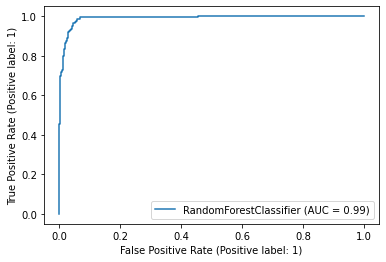

For 10.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


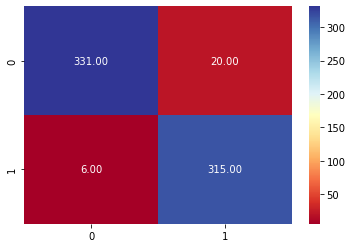

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 20.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       351
           1       0.95      0.97      0.96       321

    accuracy                           0.96       672
   macro avg       0.96      0.96      0.96       672
weighted avg       0.96      0.96      0.96       672

 
For 20.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


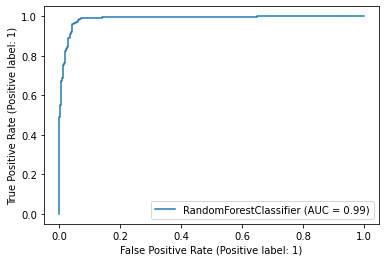

For 20.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


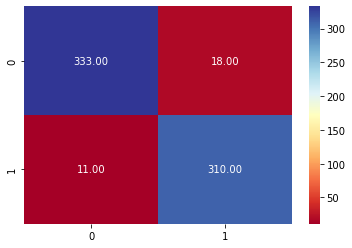

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 50.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       351
           1       0.93      0.96      0.94       321

    accuracy                           0.94       672
   macro avg       0.94      0.95      0.94       672
weighted avg       0.95      0.94      0.94       672

 
For 50.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


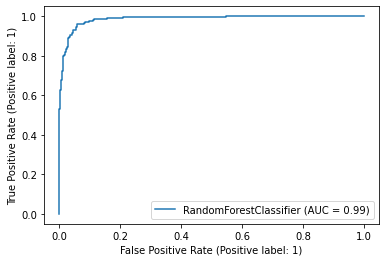

For 50.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


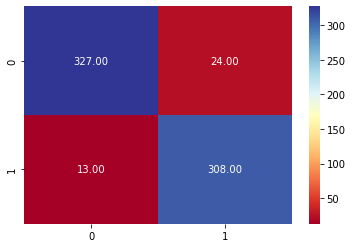

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 90.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       351
           1       0.78      0.88      0.83       321

    accuracy                           0.83       672
   macro avg       0.83      0.83      0.83       672
weighted avg       0.83      0.83      0.83       672

 
For 90.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


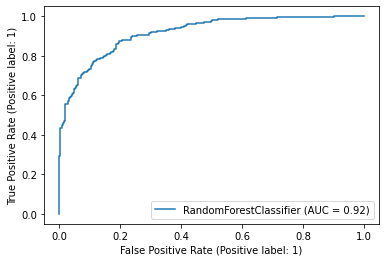

For 90.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


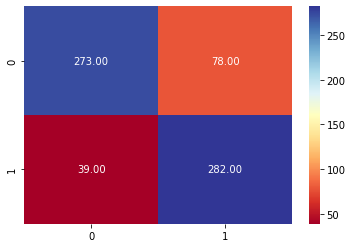

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 95.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       351
           1       0.68      0.90      0.78       321

    accuracy                           0.75       672
   macro avg       0.78      0.76      0.75       672
weighted avg       0.78      0.75      0.75       672

 
For 95.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


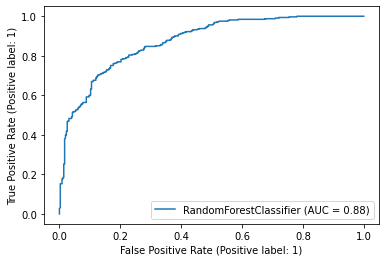

For 95.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


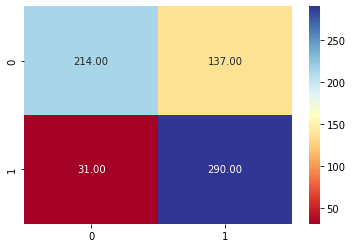

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [27]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
targetname = "Teenhome"

for i in threshold_values:
    start = timeit.default_timer()

    customer = pd.read_excel("marketing_campaign.xlsx")
    model = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100, random_state = 7, n_jobs  = -1)

    customer = clean_and_preprocess_marketing_dataset(customer)
    train_data, test_data = train_data_test_data_split(dataset = customer, frac = 1.0, random_state = 7)
    cols = train_data.columns
    cols = list(cols)
    cols.remove("Teenhome")
    cols_scaling = cols
    train_data, test_data = scaling(train_data, test_data, cols_scaling)

    
    model = unlabelled_data_and_label_propagation_and_model_fit(model=model, train_data=train_data, targetname=targetname, random_state = 7, threshold=i)

    X_test, y_test = test_data_split(test_data=test_data, targetname = targetname)

    accuracy, f1 = evaluate_model_classification(f"{i * 100}% Unlabelled Data, Classification Report", model, X_test, y_test)

    accuracy_values.append(accuracy)
    f1_values.append(f1)

    evaluate_model_roc(f"{i * 100}% Unlabelled Data, ROC Curve", model, X_test, y_test)
    evaluate_model_confusion(f"{i * 100}% Unlabelled Data, Confusion Matrix", model, X_test, y_test)
    stop = timeit.default_timer()
    timer_values.append(stop - start)
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

## Plotting Accuracy and F1 Score Trends.

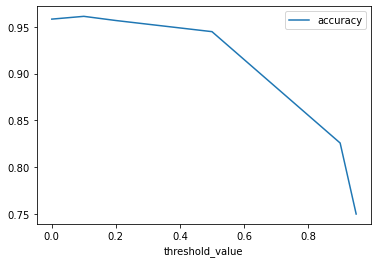

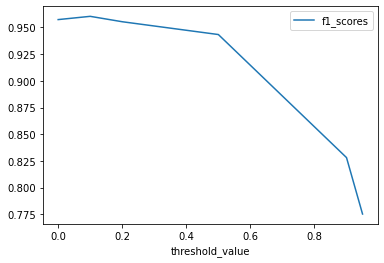

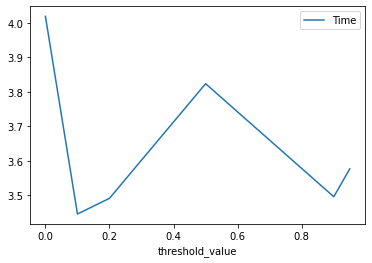

In [28]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention (Imbalanced).

## Customer Intention Preprocessing Function.

In [29]:
def clean_and_preprocess_intention_dataset(intention):
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    intention = intention[cols]
    intention = pd.get_dummies(intention, columns=["VisitorType"])
    
    return intention

## Main Code.

For 0.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3119
        True       0.71      0.52      0.60       580

    accuracy                           0.89      3699
   macro avg       0.81      0.74      0.77      3699
weighted avg       0.88      0.89      0.88      3699

 
For 0.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


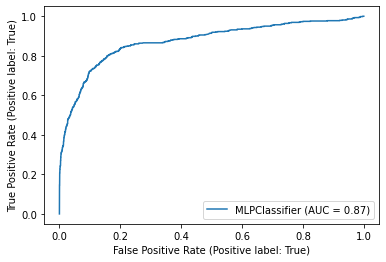

For 0.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


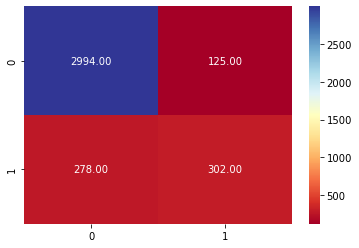

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 10.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3119
        True       0.65      0.54      0.59       580

    accuracy                           0.88      3699
   macro avg       0.78      0.74      0.76      3699
weighted avg       0.87      0.88      0.88      3699

 
For 10.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


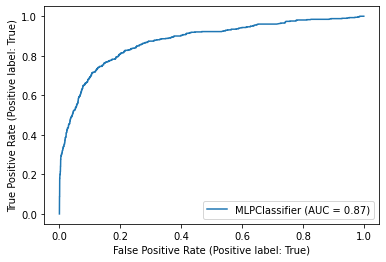

For 10.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


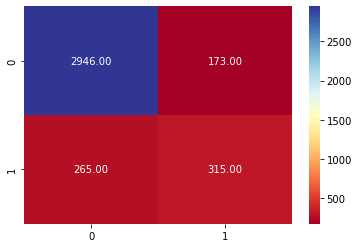

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 20.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       0.93      0.92      0.92      3119
        True       0.58      0.62      0.60       580

    accuracy                           0.87      3699
   macro avg       0.76      0.77      0.76      3699
weighted avg       0.88      0.87      0.87      3699

 
For 20.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


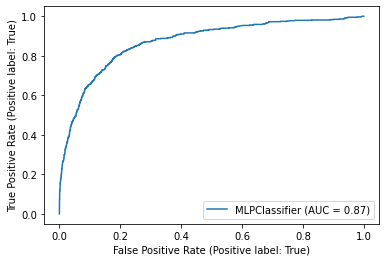

For 20.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


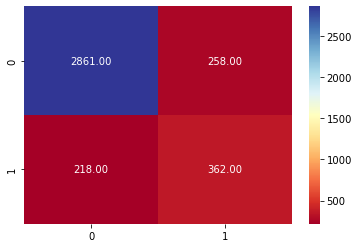

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 50.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       0.94      0.33      0.49      3119
        True       0.20      0.89      0.32       580

    accuracy                           0.42      3699
   macro avg       0.57      0.61      0.41      3699
weighted avg       0.82      0.42      0.47      3699

 
For 50.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


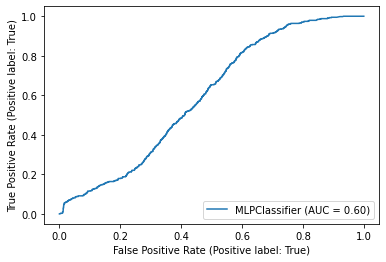

For 50.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


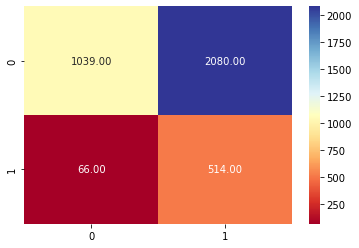

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 90.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       1.00      0.00      0.01      3119
        True       0.16      1.00      0.27       580

    accuracy                           0.16      3699
   macro avg       0.58      0.50      0.14      3699
weighted avg       0.87      0.16      0.05      3699

 
For 90.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


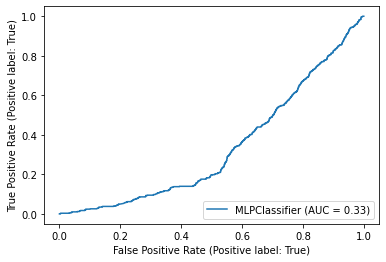

For 90.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


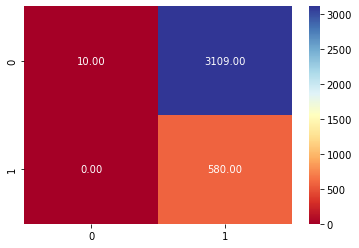

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 95.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

       False       0.85      0.00      0.01      3119
        True       0.16      1.00      0.27       580

    accuracy                           0.16      3699
   macro avg       0.50      0.50      0.14      3699
weighted avg       0.74      0.16      0.05      3699

 
For 95.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


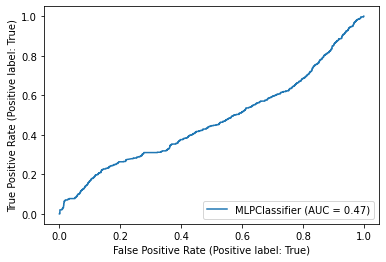

For 95.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


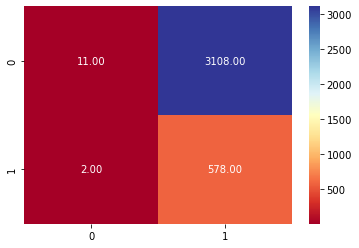

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [30]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
targetname = "Revenue"

for i in threshold_values:
    start = timeit.default_timer()

    intention = pd.read_csv("online_shoppers_intention.csv")
    model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)

    intention = clean_and_preprocess_intention_dataset(intention)
    train_data, test_data = train_data_test_data_split(dataset = intention, frac = 1.0, random_state = 7)
    cols = train_data.columns
    cols = list(cols)
    cols.remove("Revenue")
    cols_scaling = cols
    train_data, test_data = scaling(train_data, test_data, cols_scaling)

    
    model = unlabelled_data_and_label_propagation_and_model_fit(model=model, train_data=train_data, targetname=targetname, random_state = 7, threshold=i)

    X_test, y_test = test_data_split(test_data=test_data, targetname = targetname)

    accuracy, f1 = evaluate_model_classification(f"{i * 100}% Unlabelled Data, Classification Report", model, X_test, y_test)

    accuracy_values.append(accuracy)
    f1_values.append(f1)

    evaluate_model_roc(f"{i * 100}% Unlabelled Data, ROC Curve", model, X_test, y_test)
    evaluate_model_confusion(f"{i * 100}% Unlabelled Data, Confusion Matrix", model, X_test, y_test)
    stop = timeit.default_timer()
    timer_values.append(stop - start)
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

## Plotting Accuracy and F1 score trends.

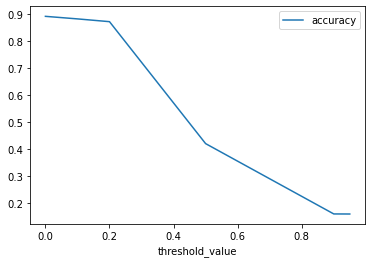

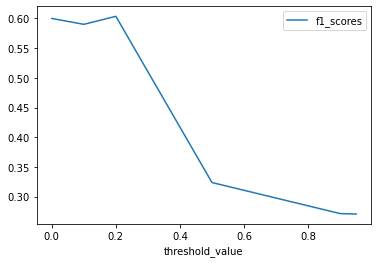

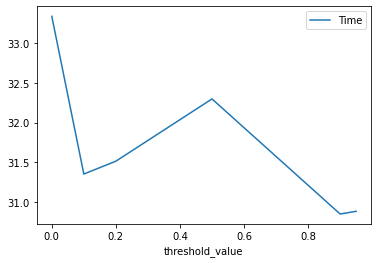

In [31]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention (Balanced - Upsampled).

## Customer Intention Preprocessing Function.

In [32]:
def clean_and_preprocess_intention_resampling():
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = intention.sample(frac = 1.0, random_state = 42)
    train_data = intention[:int(0.7 * len(intention))]
    test_data = intention[int(0.7 * len(intention)):]
    
    train_data_minority = train_data[train_data.Revenue == True]
    train_data_majority = train_data[train_data.Revenue == False]

    train_data_minority_upsampled = resample(train_data_minority,random_state=42,n_samples=7308,replace=True)
    train_data_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])
    train_data = train_data_upsampled.sample(frac = 1.0, random_state = 42)
    
    intention = pd.concat([train_data, test_data])
    
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    train_data = train_data[cols]
    test_data = test_data[cols]
    train_data = pd.get_dummies(train_data, columns=["VisitorType"])
    test_data = pd.get_dummies(test_data, columns=["VisitorType"])
    

    return train_data, test_data

## Main Code.

For 0.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3114
           1       0.51      0.67      0.58       585

    accuracy                           0.85      3699
   macro avg       0.72      0.78      0.74      3699
weighted avg       0.87      0.85      0.85      3699

 
For 0.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


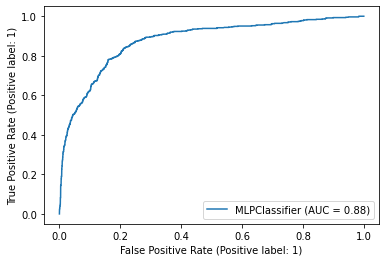

For 0.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


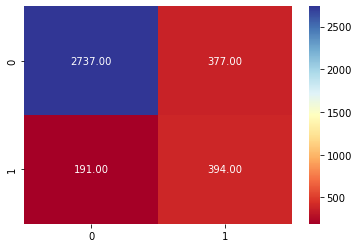

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 10.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3114
           1       0.50      0.70      0.59       585

    accuracy                           0.84      3699
   macro avg       0.72      0.79      0.74      3699
weighted avg       0.87      0.84      0.85      3699

 
For 10.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


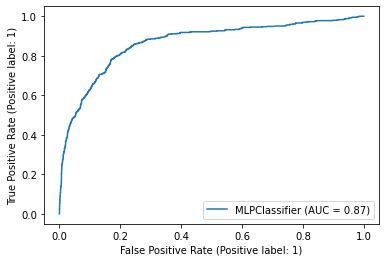

For 10.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


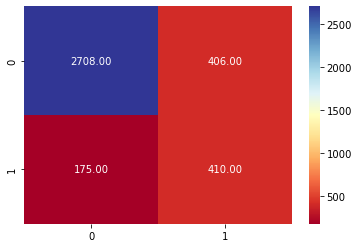

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 20.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3114
           1       0.50      0.73      0.59       585

    accuracy                           0.84      3699
   macro avg       0.72      0.80      0.75      3699
weighted avg       0.87      0.84      0.85      3699

 
For 20.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


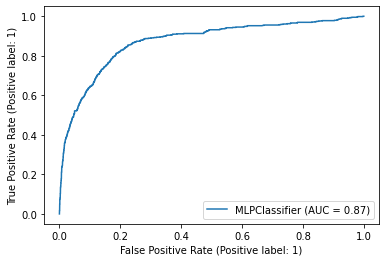

For 20.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


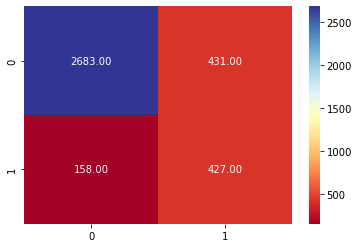

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 50.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3114
           1       0.49      0.72      0.58       585

    accuracy                           0.84      3699
   macro avg       0.72      0.79      0.74      3699
weighted avg       0.87      0.84      0.85      3699

 
For 50.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


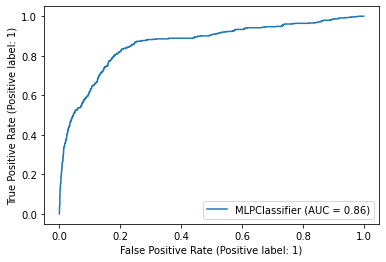

For 50.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


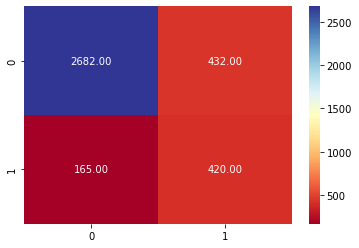

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 90.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3114
           1       0.47      0.70      0.56       585

    accuracy                           0.83      3699
   macro avg       0.70      0.77      0.73      3699
weighted avg       0.86      0.83      0.84      3699

 
For 90.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


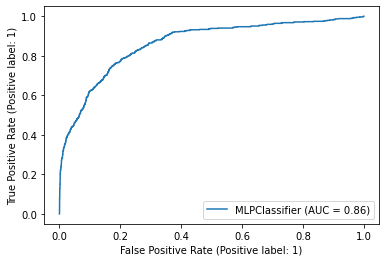

For 90.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


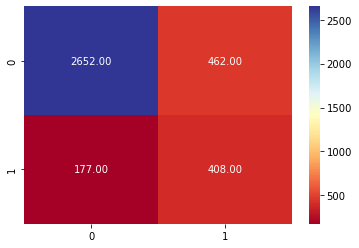

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 95.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3114
           1       0.45      0.68      0.54       585

    accuracy                           0.82      3699
   macro avg       0.69      0.76      0.71      3699
weighted avg       0.86      0.82      0.83      3699

 
For 95.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


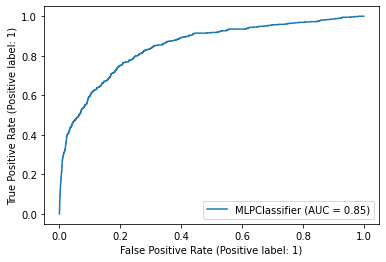

For 95.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


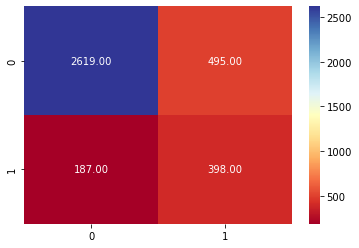

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [33]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
targetname = "Revenue"

for i in threshold_values:
    start = timeit.default_timer()

    model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)

    train_data, test_data = clean_and_preprocess_intention_resampling()
    train_data["Revenue"] *= 1
    test_data["Revenue"] *= 1
    cols = train_data.columns
    cols = list(cols)
    cols.remove("Revenue")
    cols_scaling = cols
    train_data, test_data = scaling(train_data, test_data, cols_scaling)

    
    model = unlabelled_data_and_label_propagation_and_model_fit(model=model, train_data=train_data, targetname=targetname, random_state = 7, threshold=i)

    X_test, y_test = test_data_split(test_data=test_data, targetname = targetname)

    accuracy, f1 = evaluate_model_classification(f"{i * 100}% Unlabelled Data, Classification Report", model, X_test, y_test)

    accuracy_values.append(accuracy)
    f1_values.append(f1)

    evaluate_model_roc(f"{i * 100}% Unlabelled Data, ROC Curve", model, X_test, y_test)
    evaluate_model_confusion(f"{i * 100}% Unlabelled Data, Confusion Matrix", model, X_test, y_test)
    stop = timeit.default_timer()
    timer_values.append(stop - start)
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

Plotting Accuracy and F1 score trends.

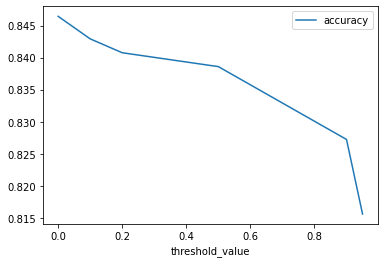

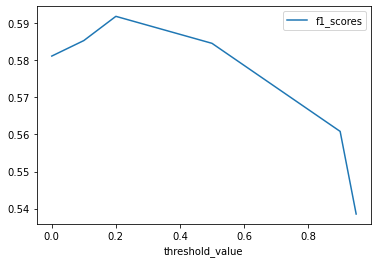

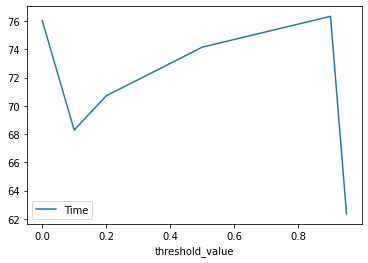

In [34]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)

# Customer Intention - Balanced Downsampled.

## Preprocessing Function.

In [35]:
def clean_and_preprocess_intention_resampling():
    intention = pd.read_csv("online_shoppers_intention.csv")
    intention = intention.sample(frac = 1.0, random_state = 42)
    train_data = intention[:int(0.7 * len(intention))]
    test_data = intention[int(0.7 * len(intention)):]
    
    train_data_minority = train_data[train_data.Revenue == True]
    train_data_majority = train_data[train_data.Revenue == False]

    train_data_minority_upsampled = resample(train_data_minority,random_state=42,n_samples=7308,replace=True)
    train_data_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])
    train_data = train_data_upsampled.sample(frac = 1.0, random_state = 42)
    
    intention = pd.concat([train_data, test_data])
    
    cols = ['Administrative', 'ProductRelated', 'ExitRates', 'VisitorType', 'Informational', 'PageValues', 'SpecialDay', 'Revenue']
    train_data = train_data[cols]
    test_data = test_data[cols]
    train_data = pd.get_dummies(train_data, columns=["VisitorType"])
    test_data = pd.get_dummies(test_data, columns=["VisitorType"])
    

    return train_data, test_data

## Main Code

For 0.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3114
           1       0.47      0.80      0.59       585

    accuracy                           0.83      3699
   macro avg       0.71      0.82      0.74      3699
weighted avg       0.88      0.83      0.84      3699

 
For 0.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


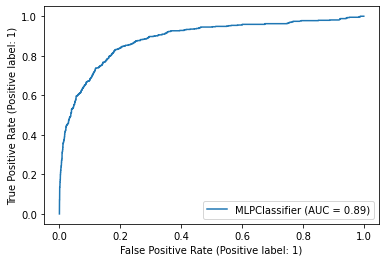

For 0.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


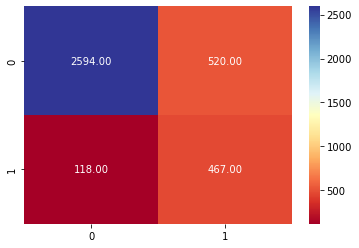

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 10.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3114
           1       0.47      0.81      0.59       585

    accuracy                           0.82      3699
   macro avg       0.71      0.82      0.74      3699
weighted avg       0.88      0.82      0.84      3699

 
For 10.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


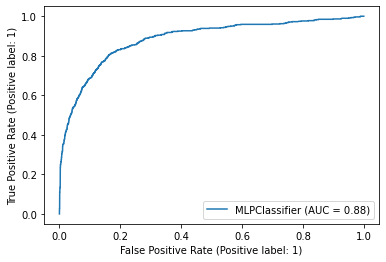

For 10.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


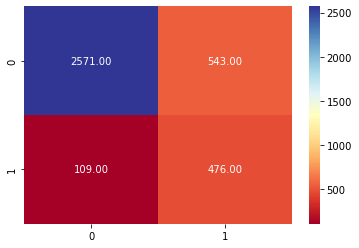

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 20.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3114
           1       0.45      0.82      0.58       585

    accuracy                           0.81      3699
   macro avg       0.70      0.82      0.73      3699
weighted avg       0.88      0.81      0.83      3699

 
For 20.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


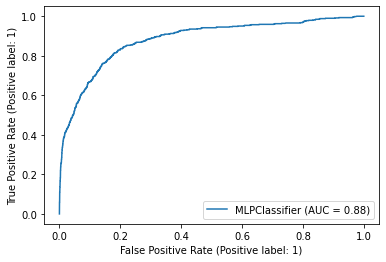

For 20.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


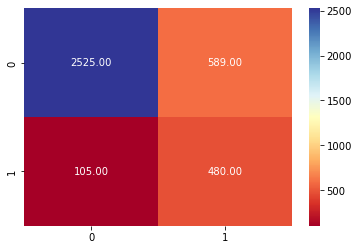

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 50.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      3114
           1       0.44      0.78      0.57       585

    accuracy                           0.81      3699
   macro avg       0.70      0.80      0.72      3699
weighted avg       0.87      0.81      0.83      3699

 
For 50.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


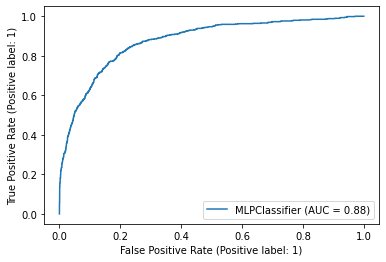

For 50.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


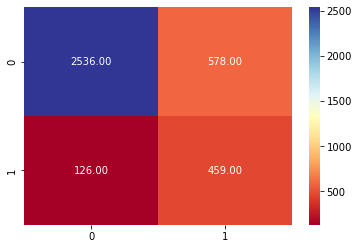

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 90.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      3114
           1       0.38      0.74      0.50       585

    accuracy                           0.77      3699
   macro avg       0.66      0.76      0.68      3699
weighted avg       0.85      0.77      0.80      3699

 
For 90.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


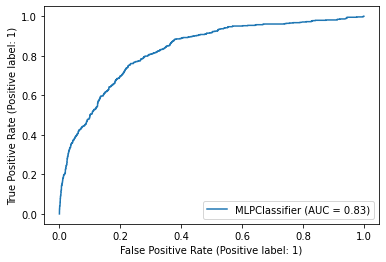

For 90.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


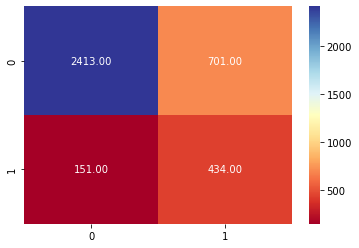

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
For 95.0% Unlabelled Data, Classification Report
 
Classification Report
 
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      3114
           1       0.33      0.70      0.45       585

    accuracy                           0.72      3699
   macro avg       0.63      0.72      0.63      3699
weighted avg       0.83      0.72      0.76      3699

 
For 95.0% Unlabelled Data, ROC Curve
 
ROC Curve
 


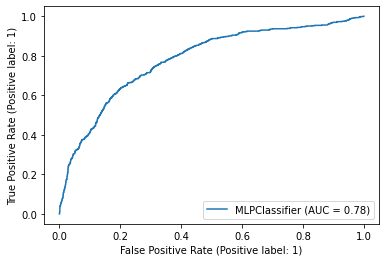

For 95.0% Unlabelled Data, Confusion Matrix
 
Confusion Matrix
 


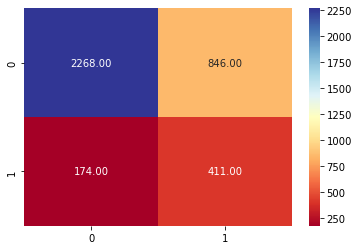

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [36]:
threshold_values = [0.0, 0.1, 0.2, 0.5, 0.9, 0.95]
accuracy_values = []
f1_values = []
timer_values = []
targetname = "Revenue"

for i in threshold_values:
    start = timeit.default_timer()

    model = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'adam', random_state = 42)

    train_data, test_data = clean_and_preprocess_intention_downsampling()
    train_data["Revenue"] *= 1
    test_data["Revenue"] *= 1
    cols = train_data.columns
    cols = list(cols)
    cols.remove("Revenue")
    cols_scaling = cols
    train_data, test_data = scaling(train_data, test_data, cols_scaling)

    
    model = unlabelled_data_and_label_propagation_and_model_fit(model=model, train_data=train_data, targetname=targetname, random_state = 7, threshold=i)

    X_test, y_test = test_data_split(test_data=test_data, targetname = targetname)

    accuracy, f1 = evaluate_model_classification(f"{i * 100}% Unlabelled Data, Classification Report", model, X_test, y_test)

    accuracy_values.append(accuracy)
    f1_values.append(f1)

    evaluate_model_roc(f"{i * 100}% Unlabelled Data, ROC Curve", model, X_test, y_test)
    evaluate_model_confusion(f"{i * 100}% Unlabelled Data, Confusion Matrix", model, X_test, y_test)
    stop = timeit.default_timer()
    timer_values.append(stop - start)
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

## Plotting Trends

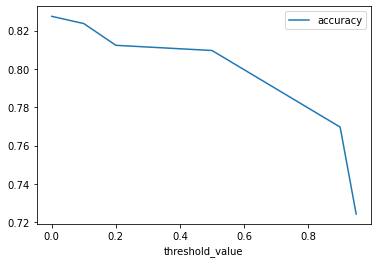

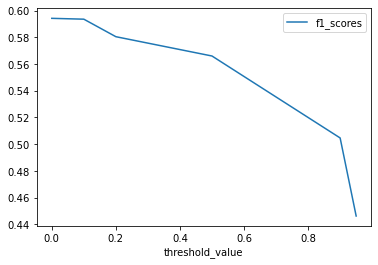

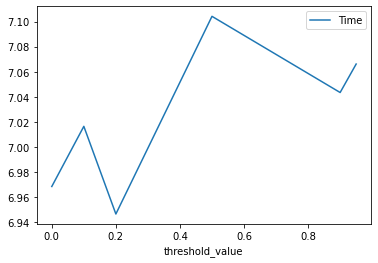

In [37]:
plot_final_trend(threshold_values, accuracy_values, f1_values, timer_values)